### Hazal Gunduz

# DATA 620 Final Project – Game Of Thrones

Your project should incorporate one or both of the two main themes of this course: network analysis and text processing. You need to show all of your work in a coherent workflow, and in a reproducible format, such as an IPython Notebook or an R Markdown document. If you are building a model or models, explain how you evaluate the “goodness” of the chosen model and parameters.

We will analyze the network of characters in the GAME OF THRONES books.
Here, two characters are considered to have appeared together if their names appear around 15 words from each other 
in the books.

The research of dataset can be found here: www.kaggle.com

### Loading Libraries

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import Markdown
import networkx as nx
from networkx.algorithms import bipartite as bi
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Dataset

This dataset creates a mesh and is exported as a text file describing the edges between characters with some attributes added to each edge. 
Let's start by loading the data for the first book, Game of Thrones, and examine it.

In [63]:
import pandas as pd

got1 = pd.read_csv('got1.csv')
got2 = pd.read_csv('got2.csv')
got3 = pd.read_csv('got3.csv')
got4 = pd.read_csv('got4.csv')
got5 = pd.read_csv('got5.csv')
print(got1.head())
print(got2.head())
print(got3.head())
print(got4.head())
print(got5.head())

                            Source              Target        Type  weight  \
0                   Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                   Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   

   book  
0     1  
1     1  
2     1  
3     1  
4     1  
              Source             Target        Type  weight  book
0  Aegon-I-Targaryen       Harren-Hoare  Undirected       4   2.0
1  Aegon-I-Targaryen                Nan  Undirected       3   2.0
2  Aegon-I-Targaryen  Rhaenys-Targaryen  Undirected       4   2.0
3  Aegon-I-Targaryen   Tyrion-Lannister  Undirected       3   2.0
4  Aegon-I-Targaryen  Visenya-Targaryen  Undirected       3   2.0
           Source             Target        Type  weight  book
0  Addam-Mar

The resulting DataFrame got1 has 5 columns: Source, Target, Type, weight, and book.

After loading the data as pandas DataFrame, it's time to create a mesh. We will use networkx, a network analysis library, and create a graphic object for the first book.

In [18]:
import networkx as nx

# Creating an empty graph object
G_got1 = nx.Graph()

Currently, the graphic object G_got1 is empty. Now let's fill it with the edges from got1. And let's load the rest of the books too!

In [20]:
# Iterate the DataFrame to add edges
for _, edge in got1.iterrows():
    G_got1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

# Creating a list of networks for all the books
gots = [G_got1]
got_fnames = ['got2.csv', 'got3.csv', 'got4.csv', 'got5.csv']
for got_fname in got_fnames:
    got = pd.read_csv(got_fname)
    G_got = nx.Graph()
    for _, edge in got.iterrows():
        G_got.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    gots.append(G_got)

Network science offers us many different metrics to measure the importance of a node in a network.
Let's measure the importance of a node in a network by looking at the number of neighbors it has, that is, the number of nodes it is connected to. For example, on Twitter, where the follower-follower relationship creates a network, an effective account is an account with a high number of followers. This measure of importance is called degree centrality.
Using this measure, let's subtract the top ten key characters from the first book (book[0]) and the fifth book (book[4]).

In [21]:
# Calculate the degree centrality of got 1
deg_cen_got1 = nx.degree_centrality(gots[0])

# Calculate the degree centrality of got 5
deg_cen_got5 = nx.degree_centrality(gots[4])

# Sorting the dictionaries to their degree centrality and storing the top 10
sorted_deg_cen_got1 =  sorted(deg_cen_got1.items(), key=lambda x:x[1], reverse=True)[0:10]

# Sorting the dictionaries to their degree centrality and storing the top 10
sorted_deg_cen_got5 =  sorted(deg_cen_got5.items(), key=lambda x:x[1], reverse=True)[0:10]

# Printing out the top 10 of got1 and got5
print(sorted_deg_cen_got1)
print(sorted_deg_cen_got5)

[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)]
[('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


By degree centrality, the most important character in the first book is Eddard Stark, but not even in the top 10 of the fifth book.

<AxesSubplot:>

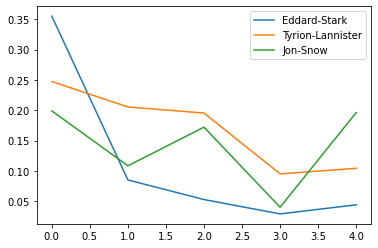

In [22]:
%matplotlib inline

# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(got) for got in gots]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

We're seeing an increase in Jon Snow's prominence on books. In the fifth book, although he is the third most important character by degree centrality, he is significantly more important than any other character in the network.

<AxesSubplot:>

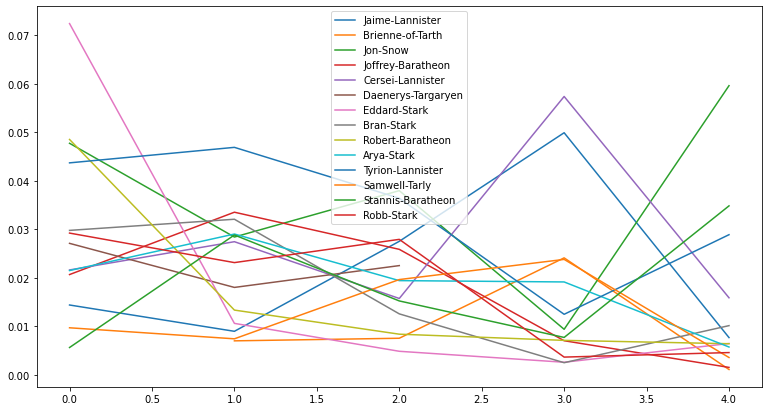

In [51]:
# Creating a list of pagerank of all the characters in all the books
evol = [nx.pagerank(got) for got in gots]

# Making a DataFrame from the list
pagerank_evol_df = pd.DataFrame.from_records(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the top characters
pagerank_evol_df[list_of_char].plot(figsize=(13, 7))

In [59]:
# Creating a list of pagerank, degree centrality
# of all the characters in the fifth book.
measures = [nx.pagerank(gots[4]), 
            nx.degree_centrality(gots[4])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)

# Calculating the correlation
cor.T.corr()

,0,1
0,1.000000,0.971493
1,0.971493,1.000000


So we've been looking at different ways to find the important characters in the Game of Thrones co-occurrence network. According to degree centrality, Eddard Stark is the most important character initially in the books. But who is/are the most important character(s) in the fifth book according to these two measures?
As we have seen is Jon Snow.

In [60]:
# Finding the most important character in the fifth book,  
# Degree centrality and pagerank.
p_rank, d_cent = cor.idxmax(axis=1)

# Printing out the top character according to the measures
print(p_rank, d_cent)

Jon-Snow Jon-Snow
